In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Latex

In [2]:
import snakes.plugins
nets = snakes.plugins.load('gv', 'snakes.nets', 'nets')
from nets import (Place, PetriNet, Transition, MultiSet, 
                  Expression, Marking, OneOf, Substitution, 
                  Test, Tuple, Variable,Value)
from IPython.display import Image, SVG

### Initial Petri Net Formulation for Firing Squad

In [3]:
def firing_squad_deterministic_petri():
    n = PetriNet("FiringSquad")
    
    n.add_place(Place("Init"))
    
    
    n.add_place(Place("Court = NoOrder"))
    n.add_place(Place("Court = Order"))
    
    n.add_place(Place("Captain = Signal"))
    n.add_place(Place("Captain = NoSignal"))
    
    n.add_place(Place("RiflemanA = NoShoot"))
    n.add_place(Place("RiflemanA = Shoot"))
    n.add_place(Place("RiflemanB = NoShoot"))
    n.add_place(Place("RiflemanB = Shoot"))
    
    n.add_place(Place("Prisoner = Alive"))
    n.add_place(Place("Prisoner = Dead"))
    
    
    
    n.add_transition(Transition("court_decision_is_unknown" ))    
    
    n.add_transition(Transition("captain_signals_if_court_orders" ))
    n.add_transition(Transition("captain_does_not_signal_if_court_does_not_order" ))
    
    n.add_transition(Transition("rifleman_A_shoots_if_captain_signals" ))
    n.add_transition(Transition("rifleman_A_does_not_shoot_if_captain_does_not_signal" ))

    n.add_transition(Transition("rifleman_B_shoots_if_captain_signals" ))
    n.add_transition(Transition("rifleman_B_does_not_shoot_if_captain_does_not_signal" ))

    n.add_transition(Transition("prisoner_dies_if_rifleman_A_shoots"))
    n.add_transition(Transition("prisoner_dies_if_rifleman_B_shoots"))
    
    n.add_transition(Transition("prisoner_lives_if_riflemen_A_and_B_do_not_shoot"))


    
    
    n.add_input("Init", "court_decision_is_unknown", Value(1))
    n.add_output("Court = NoOrder", "court_decision_is_unknown", Value(0.5))
    n.add_output("Court = Order", "court_decision_is_unknown", Value(0.5))
    
    n.add_input("Court = NoOrder", "captain_does_not_signal_if_court_does_not_order", Value(1))
    n.add_output("Captain = NoSignal", "captain_does_not_signal_if_court_does_not_order", Value(1))
   
    n.add_input("Court = Order", "captain_signals_if_court_orders", Value(1))
    n.add_output("Captain = Signal", "captain_signals_if_court_orders", Value(1))

    n.add_input("Captain = Signal", "rifleman_A_shoots_if_captain_signals", Value(1))
    n.add_output("RiflemanA = Shoot", "rifleman_A_shoots_if_captain_signals", Value(1))

    n.add_input("Captain = NoSignal", "rifleman_A_does_not_shoot_if_captain_does_not_signal", Value(1))
    n.add_output("RiflemanA = NoShoot", "rifleman_A_does_not_shoot_if_captain_does_not_signal", Value(1))
    
    n.add_input("Captain = Signal", "rifleman_B_shoots_if_captain_signals", Value(1))
    n.add_output("RiflemanB = Shoot", "rifleman_B_shoots_if_captain_signals", Value(1))

    n.add_input("Captain = NoSignal",   "rifleman_B_does_not_shoot_if_captain_does_not_signal", Value(1))
    n.add_output("RiflemanB = NoShoot", "rifleman_B_does_not_shoot_if_captain_does_not_signal", Value(1))
    
    n.add_input("RiflemanA = Shoot", "prisoner_dies_if_rifleman_A_shoots", Value(1))
    n.add_output("Prisoner = Dead",  "prisoner_dies_if_rifleman_A_shoots", Value(1))
    
    n.add_input("RiflemanA = NoShoot", "prisoner_lives_if_riflemen_A_and_B_do_not_shoot", Value(1))
    n.add_input("RiflemanB = NoShoot", "prisoner_lives_if_riflemen_A_and_B_do_not_shoot", Value(1))
    n.add_output("Prisoner = Alive",   "prisoner_lives_if_riflemen_A_and_B_do_not_shoot", Value(1))
    
    n.add_input("RiflemanB = Shoot", "prisoner_dies_if_rifleman_B_shoots", Value(1))
    n.add_output("Prisoner = Dead",  "prisoner_dies_if_rifleman_B_shoots", Value(1))    

    return n

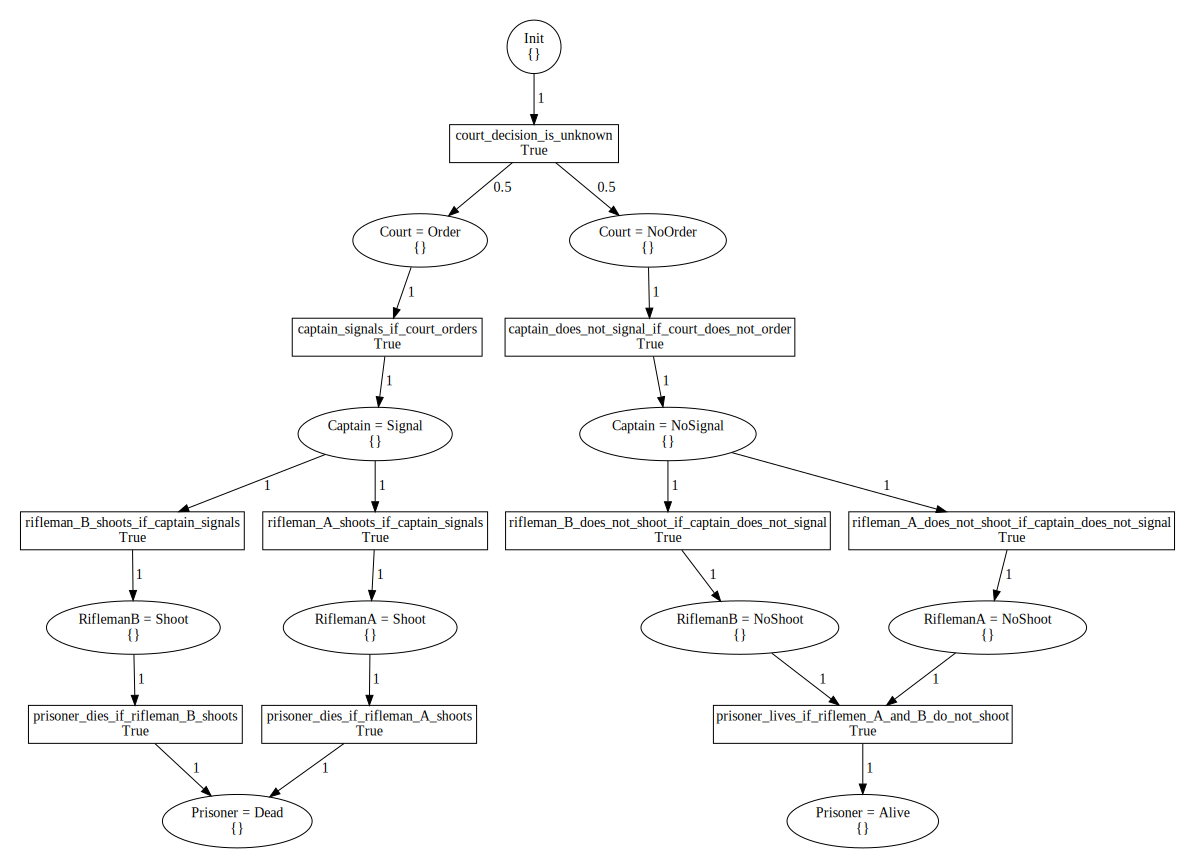

In [5]:
kappa = firing_squad_deterministic_petri()
kappa.draw('../images/firing_squad_deterministic_petri.svg')
kappa.draw('../images/firing_squad_deterministic_petri.png')

SVG('../images/firing_squad_deterministic_petri.svg')

### Current Petri Net Formulation for Firing Squad

In [6]:
def firing_squad_deterministic_petri_new():
    n = PetriNet("FiringSquad")
    
    n.add_place(Place("Init"))
    n.add_place(Place("Environment"))
    
    n.add_place(Place("Court = NoOrder"))
    n.add_place(Place("Court = Order"))
    
    n.add_place(Place("Captain = Signal"))
    n.add_place(Place("Captain = NoSignal"))
    
    n.add_place(Place("Rifleman = Standby"))
    n.add_place(Place("Rifleman = NoShoot"))
    n.add_place(Place("Rifleman = Shoot"))
    
    n.add_place(Place("Prisoner = Alive"))
    n.add_place(Place("Prisoner = Dead"))
    
    
    n.add_transition(Transition("initialize_model"))
    
    n.add_transition(Transition("court_decision_is_unknown" ))    
    
    n.add_transition(Transition("captain_signals_if_court_orders" ))
    n.add_transition(Transition("captain_does_not_signal_if_court_does_not_order" ))
    
    n.add_transition(Transition("rifleman_shoots_if_captain_signals" ))
    n.add_transition(Transition("rifleman_does_not_shoot_if_captain_does_not_signal" ))

    n.add_transition(Transition("prisoner_dies_if_rifleman_shoots"))
    


    n.add_input("Init", "initialize_model", Value(1))
    n.add_output("Environment", "initialize_model", Value(1))
    n.add_output("Rifleman = Standby", "initialize_model", Value(2))
    n.add_output("Prisoner = Alive", "initialize_model", Value(1))
    
    n.add_input("Environment", "court_decision_is_unknown", Value(1))
    n.add_output("Court = NoOrder", "court_decision_is_unknown", Value(0.5))
    n.add_output("Court = Order", "court_decision_is_unknown", Value(0.5))
    
    n.add_input("Court = NoOrder", "captain_does_not_signal_if_court_does_not_order", Value(1))
    n.add_output("Court = NoOrder", "captain_does_not_signal_if_court_does_not_order", Value(1))
    n.add_output("Captain = NoSignal", "captain_does_not_signal_if_court_does_not_order", Value(1))
    
   
    n.add_input("Court = Order", "captain_signals_if_court_orders", Value(1))
    n.add_output("Court = Order", "captain_signals_if_court_orders", Value(1))
    n.add_output("Captain = Signal", "captain_signals_if_court_orders", Value(1))

    n.add_input("Captain = Signal", "rifleman_shoots_if_captain_signals", Value(1))
    n.add_input("Rifleman = Standby", "rifleman_shoots_if_captain_signals", Value(1))
    n.add_output("Captain = Signal", "rifleman_shoots_if_captain_signals", Value(1))
    n.add_output("Rifleman = Shoot", "rifleman_shoots_if_captain_signals", Value(1))

    n.add_input("Captain = NoSignal", "rifleman_does_not_shoot_if_captain_does_not_signal", Value(1))
    n.add_input("Rifleman = Standby", "rifleman_does_not_shoot_if_captain_does_not_signal", Value(1))
    n.add_output("Captain = NoSignal", "rifleman_does_not_shoot_if_captain_does_not_signal", Value(1))
    n.add_output("Rifleman = NoShoot", "rifleman_does_not_shoot_if_captain_does_not_signal", Value(1))

    
    n.add_input("Rifleman = Shoot", "prisoner_dies_if_rifleman_shoots", Value(1))
    n.add_input("Prisoner = Alive", "prisoner_dies_if_rifleman_shoots", Value(1))
    n.add_output("Prisoner = Dead",  "prisoner_dies_if_rifleman_shoots", Value(1))    

    return n

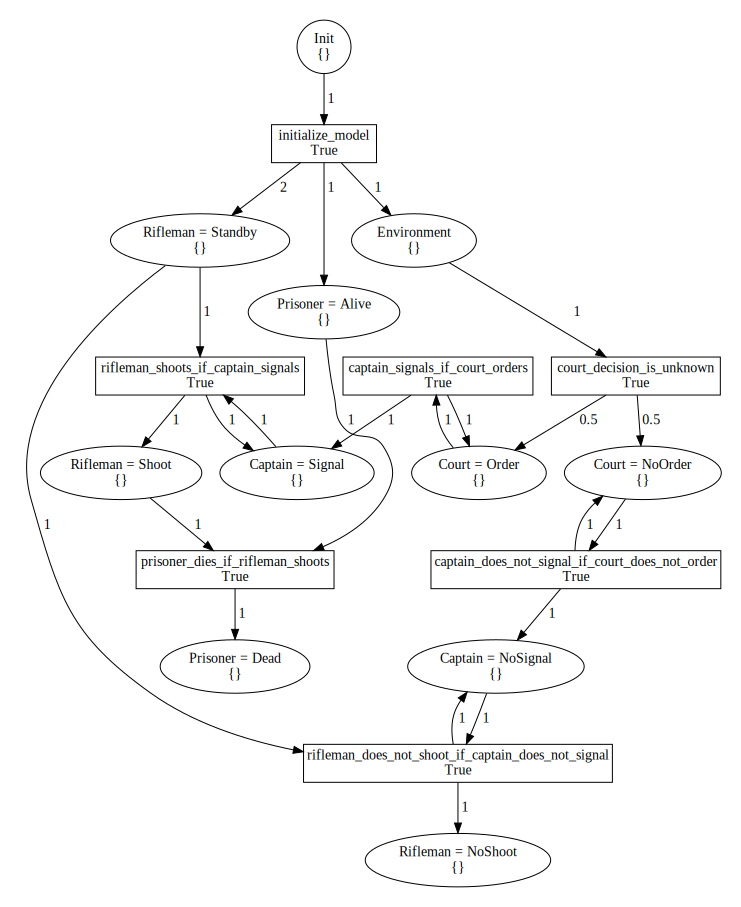

In [8]:
kappa = firing_squad_deterministic_petri_new()
kappa.draw('../images/firing_squad_deterministic_petri_new.svg')
kappa.draw('../images/firing_squad_deterministic_petri_new.png')

SVG('../images/firing_squad_deterministic_petri_new.svg')

### N Riflemen Problem

In [9]:
def n_firing_squad_deterministic_petri_new(num_riflemen = 2):
    n = PetriNet("FiringSquad")
    
    n.add_place(Place("Init"))
    n.add_place(Place("Environment"))
    
    n.add_place(Place("Court = NoOrder"))
    n.add_place(Place("Court = Order"))
    
    n.add_place(Place("Captain = Signal"))
    n.add_place(Place("Captain = NoSignal"))
    
    n.add_place(Place("Rifleman = Standby"))
    n.add_place(Place("Rifleman = NoShoot"))
    n.add_place(Place("Rifleman = Shoot"))
    
    n.add_place(Place("Prisoner = Alive"))
    n.add_place(Place("Prisoner = Dead"))
    
    
    n.add_transition(Transition("initialize_model"))
    
    n.add_transition(Transition("court_decision_is_unknown" ))    
    
    n.add_transition(Transition("captain_signals_if_court_orders" ))
    n.add_transition(Transition("captain_does_not_signal_if_court_does_not_order" ))
    
    n.add_transition(Transition("rifleman_shoots_if_captain_signals" ))
    n.add_transition(Transition("rifleman_does_not_shoot_if_captain_does_not_signal" ))

    n.add_transition(Transition("prisoner_dies_if_rifleman_shoots"))
    


    n.add_input("Init", "initialize_model", Value(1))
    n.add_output("Environment", "initialize_model", Value(1))
    n.add_output("Rifleman = Standby", "initialize_model", Value(num_riflemen))
    n.add_output("Prisoner = Alive", "initialize_model", Value(1))
    
    n.add_input("Environment", "court_decision_is_unknown", Value(1))
    n.add_output("Court = NoOrder", "court_decision_is_unknown", Value(0.5))
    n.add_output("Court = Order", "court_decision_is_unknown", Value(0.5))
    
    n.add_input("Court = NoOrder", "captain_does_not_signal_if_court_does_not_order", Value(1))
    n.add_output("Court = NoOrder", "captain_does_not_signal_if_court_does_not_order", Value(1))
    n.add_output("Captain = NoSignal", "captain_does_not_signal_if_court_does_not_order", Value(1))
    
   
    n.add_input("Court = Order", "captain_signals_if_court_orders", Value(1))
    n.add_output("Court = Order", "captain_signals_if_court_orders", Value(1))
    n.add_output("Captain = Signal", "captain_signals_if_court_orders", Value(1))

    n.add_input("Captain = Signal", "rifleman_shoots_if_captain_signals", Value(1))
    n.add_input("Rifleman = Standby", "rifleman_shoots_if_captain_signals", Value(1))
    n.add_output("Captain = Signal", "rifleman_shoots_if_captain_signals", Value(1))
    n.add_output("Rifleman = Shoot", "rifleman_shoots_if_captain_signals", Value(1))

    n.add_input("Captain = NoSignal", "rifleman_does_not_shoot_if_captain_does_not_signal", Value(1))
    n.add_input("Rifleman = Standby", "rifleman_does_not_shoot_if_captain_does_not_signal", Value(1))
    n.add_output("Captain = NoSignal", "rifleman_does_not_shoot_if_captain_does_not_signal", Value(1))
    n.add_output("Rifleman = NoShoot", "rifleman_does_not_shoot_if_captain_does_not_signal", Value(1))

    
    n.add_input("Rifleman = Shoot", "prisoner_dies_if_rifleman_shoots", Value(1))
    n.add_input("Prisoner = Alive", "prisoner_dies_if_rifleman_shoots", Value(1))
    n.add_output("Prisoner = Dead",  "prisoner_dies_if_rifleman_shoots", Value(1))    

    return n

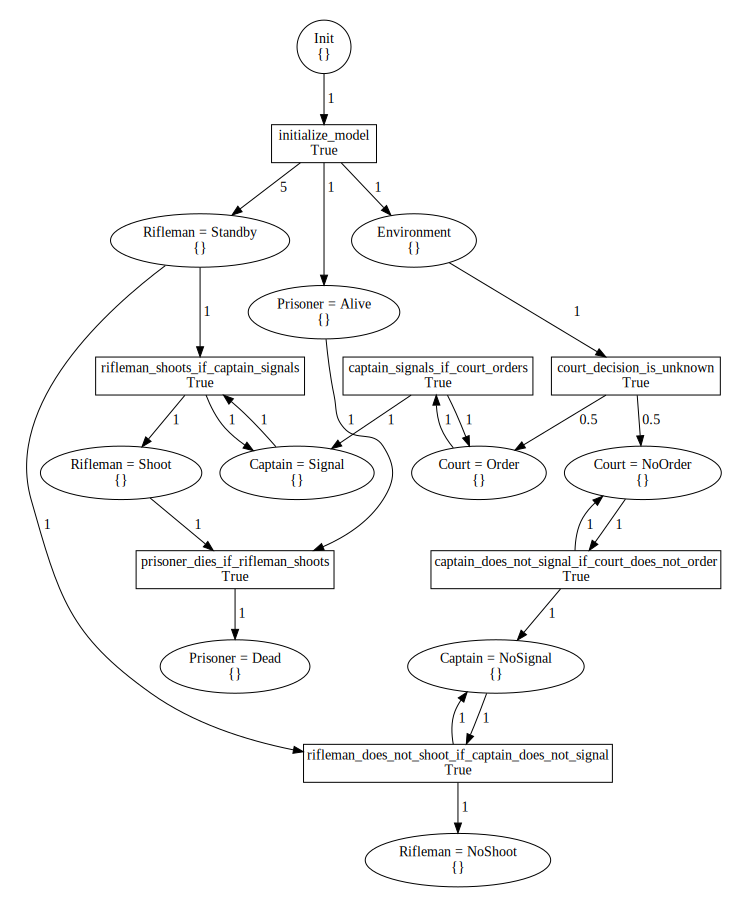

In [10]:
kappa = n_firing_squad_deterministic_petri_new(5)
kappa.draw('../images/n_firing_squad_deterministic_petri_new.svg')
kappa.draw('../images/n_firing_squad_deterministic_petri_new.png')

SVG('../images/n_firing_squad_deterministic_petri_new.svg')